# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_wrangling.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,ItemTotal
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


## Data Visualization

C:\Users\Billy\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Billy\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Billy\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


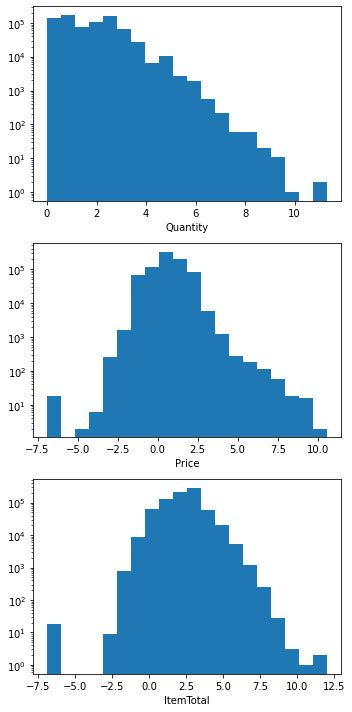

In [3]:
#create histograms for features
plt.figure(figsize=(5,10))

plt.subplot(3,1,1)
plt.hist(np.log(df.Quantity),bins=20)
plt.yscale('log')
plt.xlabel('Quantity')

plt.subplot(3,1,2)
plt.hist(np.log(df.Price),bins=20)
plt.yscale('log')
plt.xlabel('Price')

plt.subplot(3,1,3)
plt.hist(np.log(df.ItemTotal),bins=20)
plt.yscale('log')
plt.xlabel('ItemTotal')

plt.tight_layout()
plt.show()

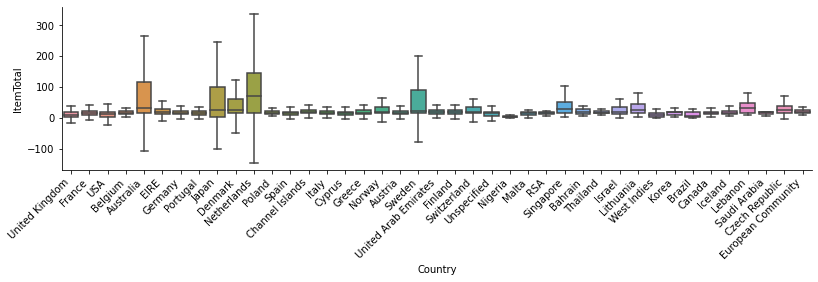

In [4]:
#create boxplots for ItemTotal for each country
sns.catplot(x='Country', y='ItemTotal', data=df, kind='box', showfliers=False, height=3, aspect=4)
plt.xticks(rotation=45, ha='right')
plt.show()

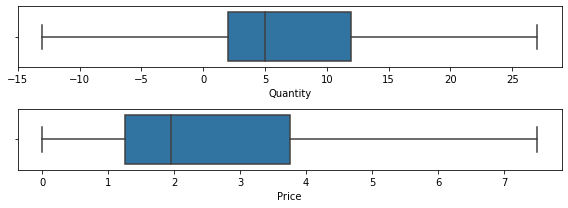

In [5]:
# create boxplots for quantity and price
fig, axes = plt.subplots(2,1,figsize=(8,3))

sns.boxplot(x='Quantity', data=df, ax=axes[0], showfliers=False)
sns.boxplot(x='Price', data=df, ax=axes[1], showfliers=False)

plt.tight_layout()
plt.show()

In [6]:
# select numeric columns for plotting
nume_cols = df[['Quantity','Price','ItemTotal']]

Text(0.5, 1.0, 'Feature Correlation Heatmap')

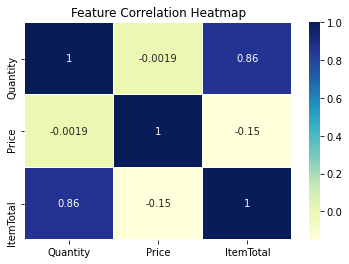

In [7]:
#create a feature correlation matrix heatmap
correlation = nume_cols.corr()
sns.heatmap(correlation, annot=True, linewidth=0.1, cmap='YlGnBu')
plt.title('Feature Correlation Heatmap')

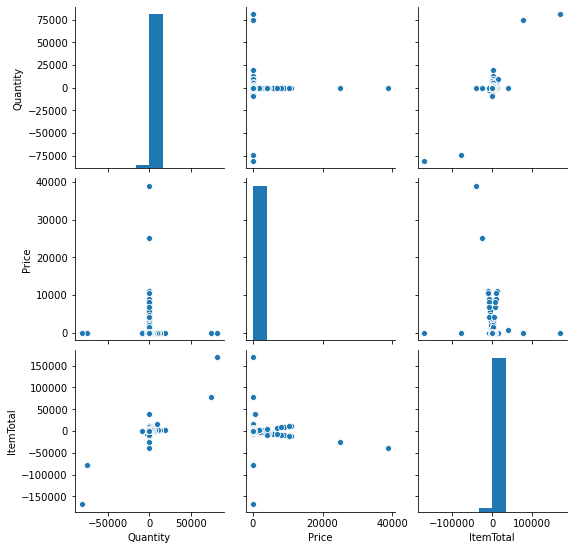

In [8]:
#create a pairplot
sns.pairplot(nume_cols)

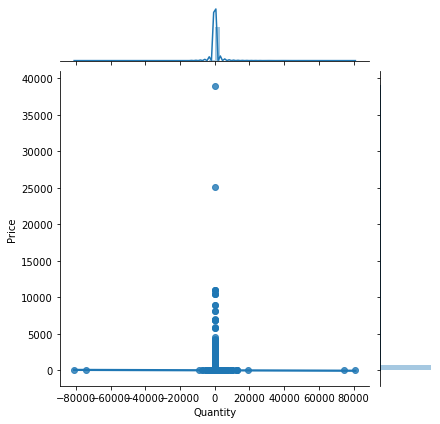

In [9]:
#create a jointplot
sns.jointplot(x='Quantity', y='Price', data=df, kind='reg')

## Hypothesis Testing

In [10]:
# calculate order total for each order
Orders = pd.DataFrame(df.groupby(['Invoice','Country']).ItemTotal.sum().reset_index())
Orders.rename({'ItemTotal':'OrderTotal'},axis=1,inplace=True)

# remove orders with negative order values
Orders = Orders[Orders['OrderTotal'] >= 0]
Orders

,Invoice,Country,OrderTotal
0,489434,United Kingdom,505.30
1,489435,United Kingdom,145.80
2,489436,United Kingdom,630.33
3,489437,United Kingdom,310.75
4,489438,United Kingdom,2286.24
...,...,...,...
36964,581583,United Kingdom,124.60
36965,581584,United Kingdom,140.64
36966,581585,United Kingdom,329.05
36967,581586,United Kingdom,339.20


In [11]:
Orders.Country.value_counts(ascending=False)

United Kingdom          33541
Germany                   789
France                    614
EIRE                      567
Netherlands               228
Spain                     154
Belgium                   149
Sweden                    104
Australia                  95
Portugal                   93
Switzerland                90
Italy                      65
Finland                    57
Channel Islands            55
Norway                     45
Austria                    45
Denmark                    43
Cyprus                     37
Japan                      33
Poland                     28
USA                        20
Greece                     18
Unspecified                16
Singapore                  11
United Arab Emirates       11
Malta                       9
Iceland                     8
Canada                      8
Israel                      7
Lithuania                   6
European Community          4
Bahrain                     4
Nigeria                     2
Korea     

In [12]:
# calculate average order value for each country
CountryAverage = pd.DataFrame(Orders.groupby('Country').OrderTotal.mean().reset_index())
CountryAverage.rename({'OrderTotal':'AverageOrder'},axis=1,inplace=True)
CountryAverage.sort_values('AverageOrder',ascending=False,inplace=True)
CountryAverage

,Country,AverageOrder
24,Netherlands,2429.991623
31,Singapore,2301.550909
0,Australia,1781.931158
21,Lebanon,1693.880000
9,Denmark,1594.899767
35,Thailand,1535.270000
17,Israel,1487.891429
19,Japan,1303.754848
26,Norway,1251.611111
34,Switzerland,1111.799333


**H0: France and Germany have the same average order value  
H1: France and Germany have different average order values**

### Bootstrap Method

In [13]:
# calculate the difference in average order values between France and Germany
FranceMean = 568
GermanyMean = 539
MeanDiff = FranceMean - GermanyMean
MeanDiff

29

In [14]:
# calculate the average order value for France and Germany together
Mean = round(Orders[(Orders['Country'] == 'France') | (Orders['Country'] == 'Germany')].OrderTotal.mean())
Mean

552

In [15]:
# shift the France and Germany orders so they have the same average order value
France_shifted = Orders[Orders['Country'] == 'France'].OrderTotal - FranceMean + Mean
Germany_shifted = Orders[Orders['Country'] == 'Germany'].OrderTotal - GermanyMean + Mean

In [16]:
# create a Bootstrap function to draw bootstrap replicates
def Bootstrap(data, func, size=1):

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = func(bs_sample)

    return bs_replicates

In [17]:
# create bootstrap replicates for France average order value
France_bs = Bootstrap(France_shifted, np.mean, size=10000)
France_bs

array([590.24389251, 566.04672638, 579.96617264, ..., 571.59526059,
       547.42656352, 612.28540717])

In [18]:
# create bootstrap replicates for Germany average order value
Germany_bs = Bootstrap(Germany_shifted, np.mean, size=10000)
Germany_bs

array([542.94582003, 577.52672243, 584.61395564, ..., 550.00503295,
       517.45054499, 560.6442725 ])

In [19]:
# calculate the difference in average order values between France and Germany
bs_replicates = France_bs - Germany_bs
bs_replicates

array([ 47.29807248, -11.47999605,  -4.647783  , ...,  21.59022763,
        29.97601852,  51.64113467])

(array([4.000e+00, 3.100e+01, 8.800e+01, 2.100e+02, 4.550e+02, 8.600e+02,
        1.235e+03, 1.489e+03, 1.578e+03, 1.357e+03, 1.147e+03, 7.070e+02,
        4.510e+02, 2.240e+02, 9.100e+01, 4.800e+01, 1.700e+01, 5.000e+00,
        2.000e+00, 1.000e+00]),
 array([-133.91761656, -118.08766863, -102.2577207 ,  -86.42777276,
         -70.59782483,  -54.7678769 ,  -38.93792896,  -23.10798103,
          -7.2780331 ,    8.55191484,   24.38186277,   40.2118107 ,
          56.04175864,   71.87170657,   87.7016545 ,  103.53160244,
         119.36155037,  135.1914983 ,  151.02144624,  166.85139417,
         182.6813421 ]),
 <a list of 20 Patch objects>)

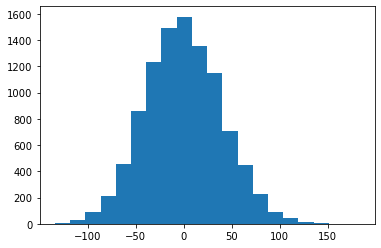

In [20]:
plt.hist(bs_replicates,bins=20)

In [21]:
# calculate p-value
p = np.sum(abs(bs_replicates) >= MeanDiff) / len(bs_replicates)
print('p-value =', p)

p-value = 0.4708


**The p value from the bootstrap test is not statistically significant to reject the null hypothesis that France and Germany have the same average order values.**

### t-test Method

In [22]:
# create series for France and Germany order values
France = Orders[Orders['Country'] == 'France'].OrderTotal
Germany = Orders[Orders['Country'] == 'Germany'].OrderTotal

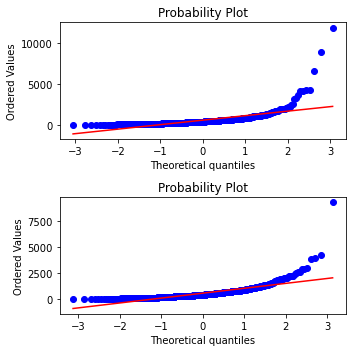

In [23]:
from scipy.stats import probplot

# create q-q plots for France and Germany orders to check normality
plt.figure(figsize=(5,5))

plt.subplot(2,1,1)
probplot(France,plot=plt)

plt.subplot(2,1,2)
probplot(Germany,plot=plt)

plt.tight_layout()
plt.show()

**From the Q-Q plots we can see that order values for France and Germany are not normally distributed, but since the sample size is large enough, we can still use the t-test here.**

In [24]:
from scipy import stats

# t-test for two means, specify unequal variances
t, p = stats.ttest_ind(France, Germany, equal_var = False)

print('p-value =', p)

p-value = 0.4556792239704469


**The p value from the t-test is not statistically significant to reject the null hypothesis that France and Germany have the same average order values.**